# Programming Exercise 7: _K_-means Clustering and Principal Component Analysis
# 2 Principal Component Analysis
## 2.1 Example Dataset

In [1]:
import scipy.io

data = scipy.io.loadmat('../matlab/ex7data1.mat')
print data.keys()

['X', '__version__', '__header__', '__globals__']


In [2]:
X = data['X']
print X.shape

(50, 2)


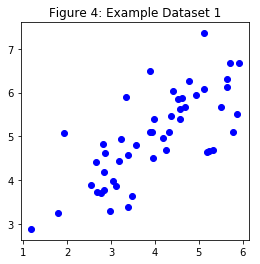

In [3]:
import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline

plt.scatter(X[:,0], X[:,1], color='b')
plt.gca().set_aspect('equal')
plt.title('Figure 4: Example Dataset 1')

## 2.2 Implementing PCA

In [4]:
def feature_normalize(X):  # cf. ex1_multi
    ### YOUR CODE HERE ###




    ######################

X_norm, mu, sigma = feature_normalize(X)

In [5]:
def pca(X):
    ### YOUR CODE HERE ###




    ######################

U, S = pca(X_norm)
print U
print S

[[-0.70710678 -0.70710678]
 [-0.70710678  0.70710678]]
[ 1.73553038  0.26446962]


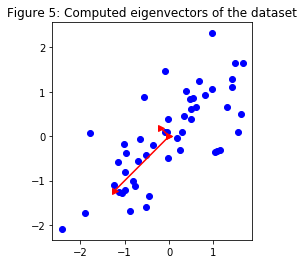

In [6]:
plt.scatter(X_norm[:,0], X_norm[:,1], color='b')
eigen_vec = U * S
plt.plot([0, eigen_vec[0,0]], [0, eigen_vec[1,0]], 'r->')
plt.plot([0, eigen_vec[0,1]], [0, eigen_vec[1,1]], 'r->')
plt.gca().set_aspect('equal')
plt.title('Figure 5: Computed eigenvectors of the dataset')

## 2.3 Dimensionality Reduction with PCA
### 2.3.1 Projecting the data onto the principal components

In [7]:
def project_data(X, U, K):
    ### YOUR CODE HERE ###



    ######################

K = 1
Z = project_data(X_norm, U, K)
print Z[0]

[ 1.49631261]


### 2.3.2 Reconstructing an approximation of the data

In [8]:
def recover_data(Z, U, K):
    ### YOUR CODE HERE ###



    ######################

X_rec = recover_data(Z, U, K)
print X_rec[0]

[-1.05805279 -1.05805279]


### 2.3.3 Visualizing the projections

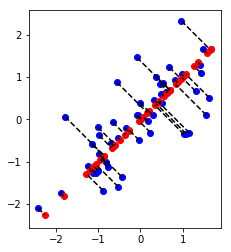

In [9]:
plt.scatter(X_norm[:,0], X_norm[:,1], color='b')
plt.scatter(X_rec[:,0], X_rec[:,1], color='r')
m, _ = X_norm.shape
for i in range(m):
    plt.plot([X_norm[i,0], X_rec[i,0]], [X_norm[i,1], X_rec[i,1]], 'k--')
plt.gca().set_aspect('equal')

## 2.4 Face Image Dataset

In [10]:
data = scipy.io.loadmat('../matlab/ex7faces.mat')
print data.keys()

['X', '__version__', '__header__', '__globals__']


In [11]:
X = data['X']
print X.shape
print X[0]

(5000, 1024)
[ -37.86631387  -45.86631387  -53.86631387 ..., -110.86631387 -111.86631387
  -99.86631387]


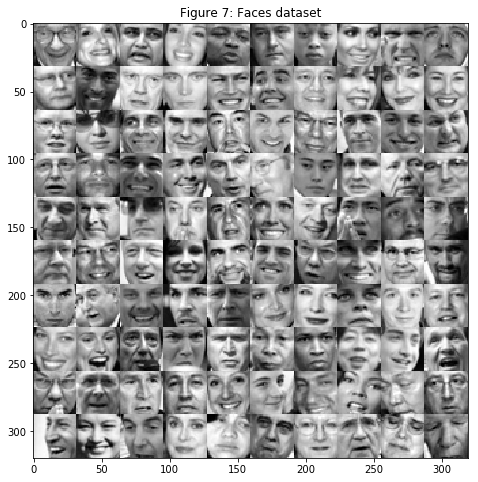

In [12]:
from PIL import Image

def row_to_image(image):
    max_, min_ = image.max(), image.min()
    image = (image - min_) / (max_ - min_)
    return image.reshape((32, 32)).T * 256

im = Image.new('I', (320, 320))
for i in range(100):
    im.paste(Image.fromarray(row_to_image(X[i, :])), ((i / 10) * 32, (i % 10) * 32))
plt.figure(figsize=(8, 8))
plt.imshow(im)
plt.title('Figure 7: Faces dataset')

### 2.4.1 PCA on Faces

In [13]:
X_norm, mu, sigma = feature_normalize(X)
U, S = pca(X_norm)
print U.shape, S.shape

(1024, 1024) (1024,)


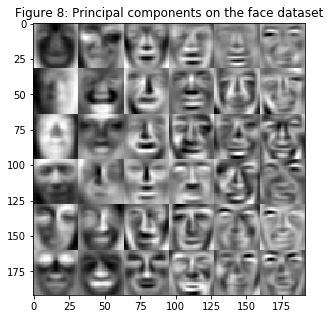

In [14]:
im = Image.new('I', (32*6, 32*6))
for i in range(36):
    im.paste(Image.fromarray(row_to_image(U[:, i])), ((i / 6) * 32, (i % 6) * 32))
plt.figure(figsize=(5, 5))
plt.imshow(im)
plt.title('Figure 8: Principal components on the face dataset')

### 2.4.2 Dimensionality Reduction

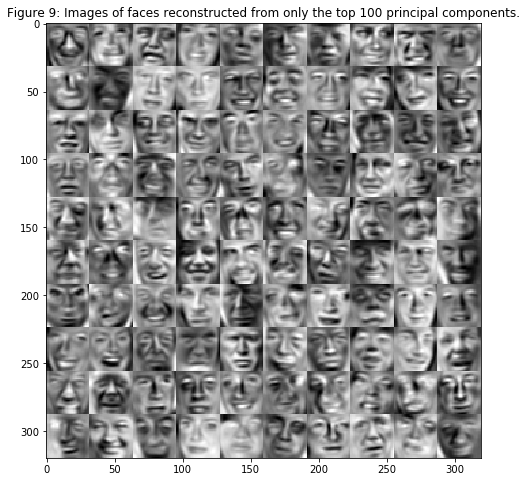

In [16]:
K = 100
Z = project_data(X_norm, U, K)
X_rec = recover_data(Z, U, K)

im = Image.new('I', (320, 320))
for i in range(100):
    im.paste(Image.fromarray(row_to_image(X_rec[i, :])), ((i / 10) * 32, (i % 10) * 32))
plt.figure(figsize=(8, 8))
plt.imshow(im)
plt.title('Figure 9: Images of faces reconstructed from only the top 100 principal components.')

## 2.5 Optional (ungraded) exercise: PCA for visualization
(Skipped)